In [1]:
### Setting up the environment.

import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

allData = pd.read_csv('db_mlb_project_week2.csv')
allData['GameDate'] = pd.to_datetime(allData['GameDate'], format='%Y-%m-%d')

In [2]:
### Feature Engineering

# Offshift GameDate by 1
x1 = allData['GameDate'].values
x2 = np.hstack((x1[1:],x1[:1]))

# Create DaysRest Feature to represent the number of days rest given between the first game of statistical record and the decision game.
#allData['NextGame'] = pd.to_datetime(pd.Series(x2, index=allData.index), format='%Y-%m-%d')
#allData['DaysRest'] = (allData['NextGame'] - allData['GameDate']).astype
#('timedelta64[D]').astype(int)

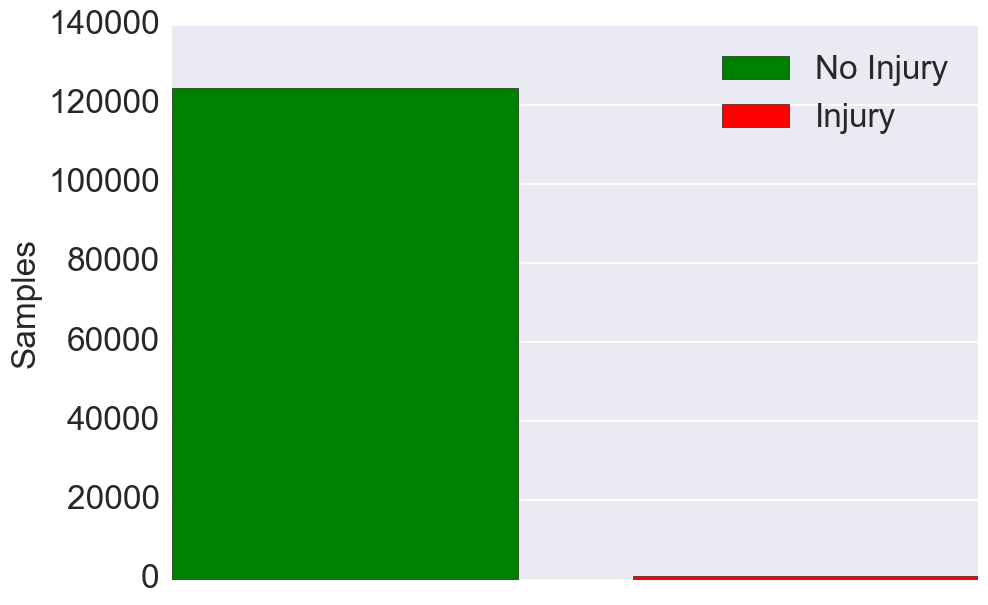

In [3]:
### Eliminate last game of pitcher's career.
### Eliminate pitchers with age 0.

#someData1 = allData[allData['DaysRest']>0]
someData = allData[allData['ages']>0]
#someData = someData2

### Downsample.
posData = someData.loc[someData.index[someData['targets'].values==1],:]
preNegData = someData.loc[someData.index[someData['targets'].values==0],:]
negData = preNegData.sample(int(sum(posData['targets'])))
frames = [negData, posData]
dsData = pd.concat(frames)

N = 2
ind = np.arange(N)
injured = len(posData)
width = 0.15
notInjured = len(allData)-len(posData)
a=plt.bar(0.1,notInjured, width, color='g')
b=plt.bar(0.3,injured, width, color='r')
#plt.rcParams['figure.figsize']=(5,8)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Samples',fontsize=24)
plt.yticks(fontsize=24)
plt.legend((a[0], b[0]), ('No Injury', 'Injury'),fontsize=24)
plt.show()

In [ ]:
bins = np.linspace(someData.ages.min(),someData.ages.max(),14)
ax1 = posData.ages.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.ages.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('Age',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
bins = np.linspace(someData.DaysRest.min(),8,8)
ax1 = posData.DaysRest.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.DaysRest.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('Days Rest',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
bins = np.linspace(someData.GSc.min(),someData.GSc.max(),14)
ax1 = posData.GSc.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.GSc.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('Game Score ("WAR")',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
bins = np.linspace(someData.BB.min(),someData.BB.max(),12)
ax1 = posData.BB.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.BB.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('BB (Walks)',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
bins = np.linspace(someData.IP.min(),someData.IP.max(),12)
ax1 = posData.IP.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.IP.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('Innings Pitched',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
bins = np.linspace(someData.ERA.min(),10,12)
ax1 = posData.ERA.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.ERA.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('ERA',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
bins = np.linspace(someData.aLI.min(),someData.aLI.max(),12)
ax1 = posData.aLI.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.aLI.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('aLI',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
bins = np.linspace(someData.Pit.min(),someData.Pit.max(),12)
ax1 = posData.Pit.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.Pit.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('Pitches',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

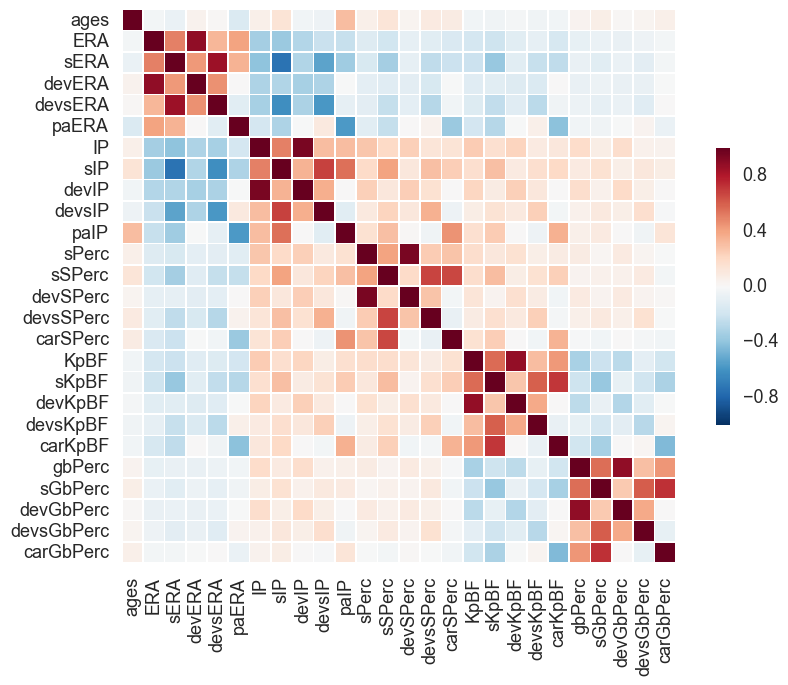

In [4]:
X = someData[['ages', \
               'ERA', 'sERA', 'devERA', 'devsERA', 'paERA', \
               'IP', 'sIP', 'devIP', 'devsIP', 'paIP', \
               'sPerc', 'sSPerc', 'devSPerc', 'devsSPerc', 'carSPerc', \
               'KpBF', 'sKpBF', 'devKpBF', 'devsKpBF', 'carKpBF', \
               'gbPerc', 'sGbPerc', 'devGbPerc', 'devsGbPerc', 'carGbPerc']]
Xlabels = ['ages', \
               'ERA', 'sERA', 'devERA', 'devsERA', 'paERA', \
               'IP', 'sIP', 'devIP', 'devsIP', 'paIP', \
               'sPerc', 'sSPerc', 'devSPerc', 'devsSPerc', 'carSPerc', \
               'KpBF', 'sKpBF', 'devKpBF', 'devsKpBF', 'carKpBF', \
               'gbPerc', 'sGbPerc', 'devGbPerc', 'devsGbPerc', 'carGbPerc']
corr = X.corr()
X = X.values
y = dsData['targets'].values
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,vmax=1,square=True,linewidths=.5,cbar_kws={"shrink": .5})
plt.show()

In [ ]:
### Doing machine learning.
# First, a simple linear model.
from sklearn import model_selection, linear_model

selData = dsData
X = selData[['sERA','sIP','devIP','devsIP','ages','interceptRow']].values
y = selData['targets'].values
Xlabels = ['sERA','sIP','devIP','devsIP','ages','interceptRow']
cvss = model_selection.ShuffleSplit(n_splits=3, test_size=0.3)
logistic = linear_model.LogisticRegression()
scores_logistic = model_selection.cross_val_score(logistic, X, y, cv=cvss)
print scores_logistic.mean(), scores_logistic.std()
logistic.fit(X,y)
print logistic.coef_

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

X = dsData[['ages', \
               'ERA', 'sERA', 'devERA', 'devsERA', 'paERA', \
               'IP', 'sIP', 'devIP', 'devsIP', 'paIP', \
               'sPerc', 'sSPerc', 'devSPerc', 'devsSPerc', 'carSPerc', \
               'KpBF', 'sKpBF', 'devsKpBF', 'devsSPerc', 'carKpBF', \
               'gbPerc', 'sGbPerc', 'devGbPerc', 'devsGbPerc', 'carGbPerc']]
Xlabels = ['Age', \
               'Last Game Performance', 'Last 7 Games Performance', 'devERA', 'devsERA', 'Career Performance', \
               'Last Game Workload', 'Last 7 Games Workload', 'devIP', 'devsIP', 'Career Workload', \
               'Last Game Strike Percentage', 'sSPerc', 'devSPerc', 'devsSPerc', 'carSPerc', \
               'Last Game Strikeouts/Batter', 'sKpBF', 'devsKpBF', 'devsSPerc', 'carKpBF', \
               'gbPerc', 'sGbPerc', 'devGbPerc', 'devsGbPerc', 'Career Groundballs/Out']
y = dsData['targets'].values

cvss = model_selection.ShuffleSplit(n_splits=3, test_size=0.3)
logistic = RandomForestClassifier(n_estimators=1000,oob_score=True)
scores_logistic = model_selection.cross_val_score(logistic, X, y, cv=cvss)
print scores_logistic.mean(), scores_logistic.std()

rfc = logistic.fit(X,y)

0.614814814815 0.0381289903485


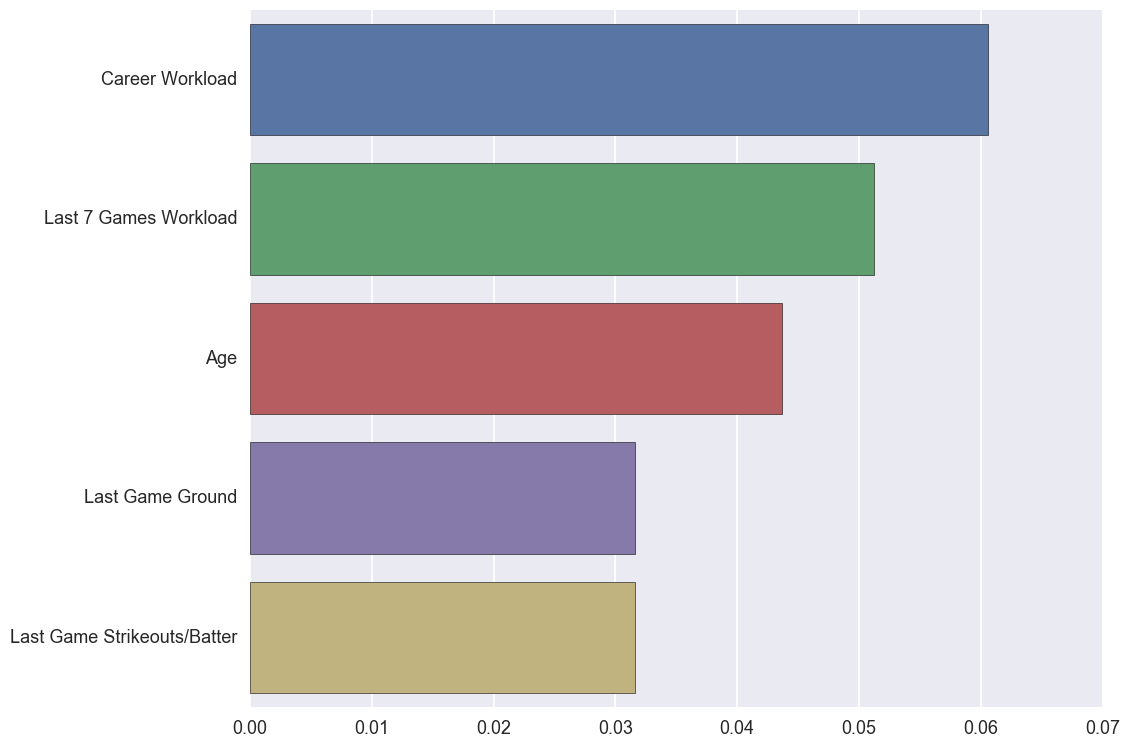

In [9]:
Xlabels = ['Age', \
               'Last Game Performance', 'Last 7 Games Performance', 'devERA', 'devsERA', 'Career Performance', \
               'Last Game Workload', 'Last 7 Games Workload', 'devIP', 'devsIP', 'Career Workload', \
               'Last Game Strike Percentage', 'sSPerc', 'devSPerc', 'devsSPerc', 'carSPerc', \
               'Last Game Strikeouts/Batter', 'sKpBF', 'devsKpBF', 'devsSPerc', 'carKpBF', \
               'Last Game Ground', 'sGbPerc', 'devGbPerc', 'devsGbPerc', 'Career Groundballs/Out']

feature_importance = (np.vstack((np.arange(len(rfc.feature_importances_)), rfc.feature_importances_)).T)
ranking = feature_importance[feature_importance[:,1].argsort()[::-1]]
ranked_list = []
ranked_labels = []
for rank, importance in ranking[(0,1,2,-2,-1),:]:
    ranked_list.append(importance)
    ranked_labels.append(Xlabels[int(rank)])
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.barplot(x=ranked_list, y=ranked_labels)

plt.show()

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=1000) 

param_grid = { 
    'n_estimators'      : [200, 1000],
    'max_depth'         : [10, 20],
    'min_samples_split' : [2, 4] ,
    'bootstrap'         : [True, False]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print CV_rfc.best_params_

In [ ]:
selData = dsData
X = selData[['sERA','sIP','devIP','devsIP','ages','interceptRow']].values
y = selData['targets'].values
Xlabels = ['sERA','sIP','devIP','devsIP','ages','interceptRow']
#selData.to_csv('temp.csv')
#model = RandomForestClassifier(n_estimators=30,max_depth=2)

from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
def myTransforms(Mat):
    M = Mat[:,:-1]
    #M[:,0] = normalize(M[:,0])
    #M[:,1] = normalize(np.log(M[:,1]))
    #M[:,3] = normalize(M[:,3])
    #longRest = M[:,2]>6
    #notLongRest = M[:,2]<=6
    #numLongRest = sum(longRest)
    #numNotLongRest = sum(notLongRest)
    #M[notLongRest,2] = np.zeros(1,numNotLongRest)
    #M[longRest,2] = np.ones(1,numLongRest)
    columns = range(M.shape[1])
    means = np.zeros(len(columns))
    stds = np.zeros(len(columns))
    for column in columns:
        mean_temp = M[:,column].mean()
        std_temp = M[:,column].std()
    means[column] = mean_temp
    stds[column] = std_temp
    M[:,column] = (M[:,column]-mean_temp)/std_temp
    M = np.concatenate((M,Mat[:,-1].reshape(-1,1)),axis=1)
    return M

ipca = IncrementalPCA(n_components=8)
ipca.fit(myTransforms(X))
Xt = ipca.transform(myTransforms(X))
cv = cross_validation.ShuffleSplit(len(y), n_iter=3, test_size=0.3)
logistic = linear_model.Logistic()
scores_logistic = cross_validation.cross_val_score(logistic, X, y, cv=cv)
print scores_logistic.mean(), scores_logistic.std()
#print type(X)
#logistic.fit(Xt,y)
sns.heatmap(Xt[:10,:],vmax=1,square=True,linewidths=.5,cbar_kws={"shrink": .5})
plt.show()
sns.heatmap(X[:10,:],vmax=1,square=True,linewidths=.5,cbar_kws={"shrink": .5})
plt.show()

In [ ]:
Xdf = pd.DataFrame(data=X,columns=Xlabels)
corr = Xdf.corr()
sns.heatmap(corr,vmax=1,square=True,linewidths=.5,cbar_kws={"shrink": .5},xticklabels=Xlabels,yticklabels=Xlabels)
plt.show()
print X.shape, len(Xlabels)

In [ ]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=8)
ipca.fit(myTransforms(X))
print ipca.explained_variance_ratio_
sns.heatmap(ipca.components_,xticklabels=Xlabels,vmax=1,square=True,linewidths=.5,cbar_kws={"shrink": .5})
plt.show()
print sum(ipca.explained_variance_ratio_)
print ipca.transform(myTransforms(X[:,:10]))

In [ ]:
bayesConvert(tY.flatten(),myEval)

In [ ]:
#from model_selection impo
if True:
    mySplits = 3
    kf = model_selection.KFold(n_splits=mySplits,shuffle=True)
    j = 0
    print type(X)
    #X = X.values
    
    for train_indices, test_indices in kf.split(X):
        features_train = X[train_indices,:]
        features_test = X[test_indices,:]
        targets_train = y[train_indices]
        targets_test = y[test_indices]
        #features_train = features_train
        #features_test = features_test
        
    #    targets_test = pd.Series(np.random.shuffle(targets_test.values), index=targets_test.index)
    #    model.fit(X,y)
    #    pred = model.predict_proba(features_test)
    ##    for i in range(len(thres_array)):
     #       true_pos = float(sum((pred[:,1] < thres_array[i]) & (targets_test == 0)))
    #  #      print true_pos
      #      true_pos /= len(targets_test)-sum(targets_test)
    #  #      false_pos = float(sum((pred[:,1] < thres_array[i]) & (targets_test == 1)))
      #      print false_pos
    #  #      false_pos /= len(targets_test)-(len(targets_test)-sum(targets_test))
      #      roc_array[i,0,j] = true_pos
    #  #      roc_array[i,1,j] = false_pos
      #  j += 1
    from sklearn.metrics import roc_curve, auc
    model = logistic
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    logistic.fit(features_train,targets_train)
    fpr, tpr, _ = roc_curve(targets_test, model.predict_proba(features_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', \
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
 #   print model.coef_

In [6]:
### Testing

tData = someData[['ages', \
               'ERA', 'sERA', 'devERA', 'devsERA', 'paERA', \
               'IP', 'sIP', 'devIP', 'devsIP', 'paIP', \
               'sPerc', 'sSPerc', 'devSPerc', 'devsSPerc', 'carSPerc', \
               'KpBF', 'sKpBF', 'devKpBF', 'devsKpBF', 'carKpBF', \
               'gbPerc', 'sGbPerc', 'devGbPerc', 'devsGbPerc', 'carGbPerc', 'targets']]
tData = tData.replace([np.inf, -np.inf], np.nan)
tData = tData.dropna()
#print tData.max()
tX = tData[['ages', \
               'ERA', 'sERA', 'devERA', 'devsERA', 'paERA', \
               'IP', 'sIP', 'devIP', 'devsIP', 'paIP', \
               'sPerc', 'sSPerc', 'devSPerc', 'devsSPerc', 'carSPerc', \
               'KpBF', 'sKpBF', 'devKpBF', 'devsKpBF', 'carKpBF', \
               'gbPerc', 'sGbPerc', 'devGbPerc', 'devsGbPerc', 'carGbPerc']].values
tY = tData[['targets']].values
myEval = rfc.predict_proba(tX)[:,1]

(124656,)
(124656,)


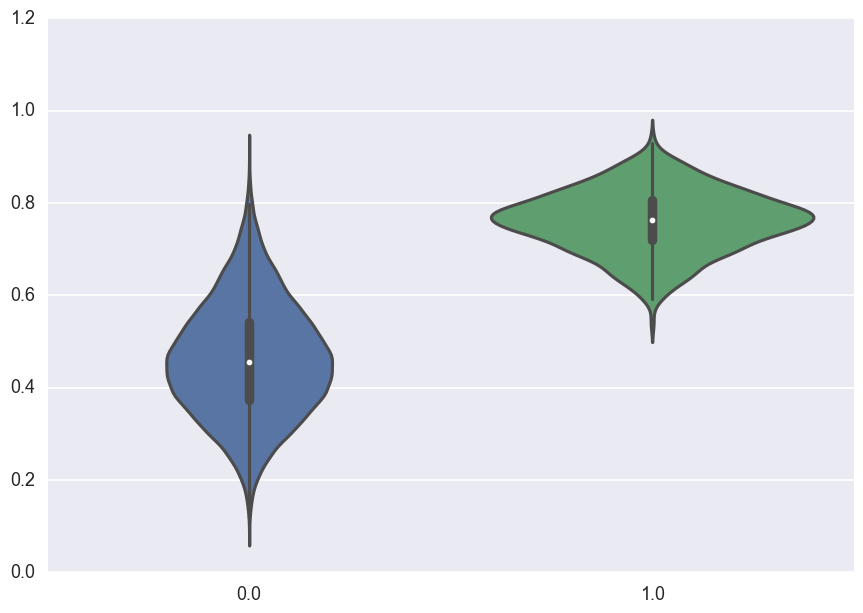

In [7]:
sns.violinplot(tY.flatten(),myEval)
print tY.flatten().shape
print myEval.shape
plt.show()

In [ ]:
# Refine the linear model with normalization of well-behaved features
#    (NOT Days Rest)
# Add in a few new ones that are well-behaved.

def myNormalize(M):
    for col in range(M.shape[1]):
        mean = M[:,col].mean()
        std = M[:,col].std()
        meanCol = mean*np.ones((M.shape[0],1))
        stdCol = std*np.ones((M.shape[0],1))
        myCol = M[:,col].reshape(len(meanCol),1)
        myCol = (myCol-meanCol)/stdCol
        M[:,col] = myCol.reshape(len(meanCol))
    return M
Xt = X
Xt[:,:-1] = myNormalize(Xt[:,:-1])
cvss = model_selection.ShuffleSplit(n_splits=3, test_size=0.3)
logistic = linear_model.LogisticRegression()
scores_logistic = model_selection.cross_val_score(logistic, Xt, y, cv=cvss)
print scores_logistic.mean(), scores_logistic.std()
logistic.fit(Xt,y)
print logistic.coef_